### Project

Your boss has just acquired data about how much audiences and critics like movies as well as numerous other variables about the movies. This dataset is provided below, and it includes information from Rotten Tomatoes and IMDB for a random sample of movies.

She is interested in learning what attributes make a movie popular. She is also interested in learning something new about movies. She wants you team to figure it all out.

As part of this project you will complete exploratory data analysis (EDA), modeling, and prediction.

The data set is comprised of 651 randomly sampled movies produced and released before 2016.

Some of these variables are only there for informational purposes and do not make any sense to include in a statistical analysis. It is up to you to decide which variables are meaningful and which should be omitted. For example information in the the `actor1` through `actor5` variables was used to determine whether the movie casts an actor or actress who won a best actor or actress Oscar.

You might also choose to omit certain observations or restructure some of the variables to make them suitable for answering your research questions.

When you are fitting a model you should also be careful about collinearity, as some of these variables may be dependent on each other.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import _hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             651 non-null    object 
 1   title_type        651 non-null    object 
 2   genre             651 non-null    object 
 3   runtime           650 non-null    float64
 4   mpaa_rating       651 non-null    object 
 5   studio            643 non-null    object 
 6   thtr_rel_year     651 non-null    int64  
 7   thtr_rel_month    651 non-null    int64  
 8   thtr_rel_day      651 non-null    int64  
 9   dvd_rel_year      643 non-null    float64
 10  dvd_rel_month     643 non-null    float64
 11  dvd_rel_day       643 non-null    float64
 12  imdb_rating       651 non-null    float64
 13  imdb_num_votes    651 non-null    int64  
 14  critics_rating    651 non-null    object 
 15  critics_score     651 non-null    int64  
 16  audience_rating   651 non-null    object 
 1

In [5]:
df.describe(include='all')

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
count,651,651,651,650.000000,651,643,651.000000,651.000000,651.000000,643.000000,643.000000,643.000000,651.000000,651.000000,651,651.000000,651,651.000000,651,651,651,651,651,651,649,649,644,642,638,636,651,651
unique,647,3,11,NaN,6,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,2,2,2,2,2,2,532,485,572,601,607,615,650,650
top,Where the Heart Is,Feature Film,Drama,NaN,R,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rotten,NaN,Upright,NaN,no,no,no,no,no,no,Martin Scorsese,John Travolta,Diane Keaton,Gary Busey,John P. Ryan,Joan Cusack,http://www.imdb.com/title/tt1155592/,//www.rottentomatoes.com/m/man_on_wire/
freq,2,591,305,NaN,329,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307,NaN,376,NaN,629,644,558,579,608,636,4,7,5,3,3,2,2,2
mean,NaN,NaN,NaN,105.821538,NaN,NaN,1997.941628,6.740399,14.416283,2004.427683,6.332815,15.007776,6.493088,57532.983103,NaN,57.688172,NaN,62.362519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,19.445047,NaN,NaN,10.974501,3.554223,8.861167,4.643588,3.378228,8.867400,1.084747,112124.386910,NaN,28.402971,NaN,20.222624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,NaN,NaN,1970.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.900000,180.000000,NaN,1.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,92.000000,NaN,NaN,1990.000000,4.000000,7.000000,2001.000000,3.000000,7.000000,5.900000,4545.500000,NaN,33.000000,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,103.000000,NaN,NaN,2000.000000,7.000000,15.000000,2004.000000,6.000000,15.000000,6.600000,15116.000000,NaN,61.000000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,115.750000,NaN,NaN,2007.000000,10.000000,21.000000,2008.000000,9.000000,23.000000,7.300000,58300.500000,NaN,83.000000,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(651, 32)

In [7]:
df.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'], dtype='object')

### Data Visualization

### Univariate Data Exploration

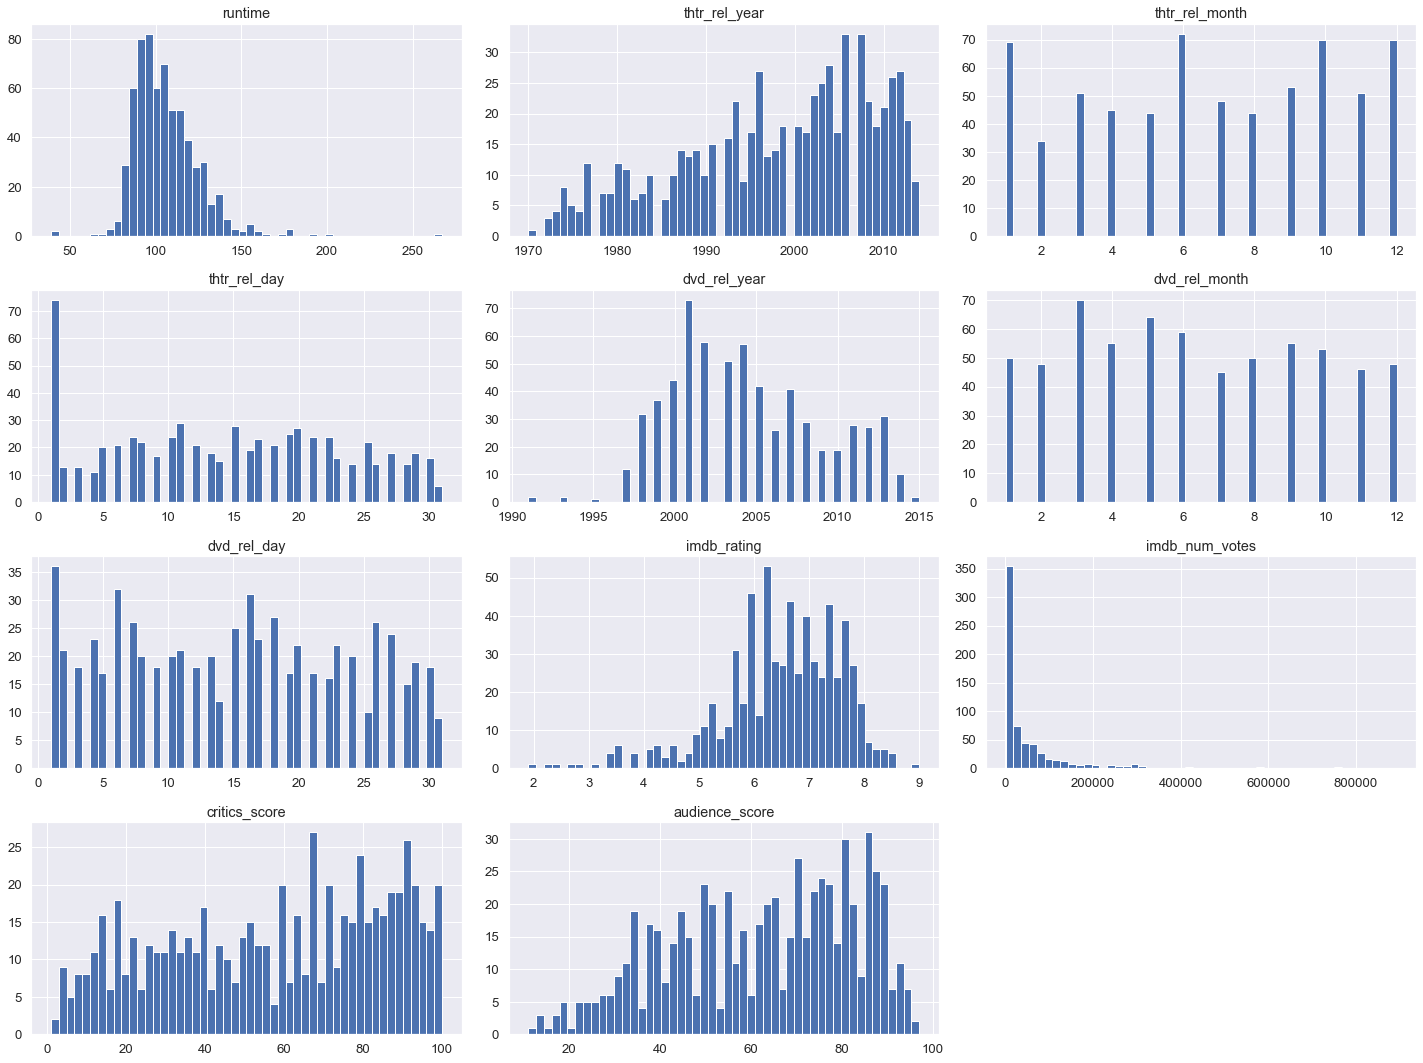

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

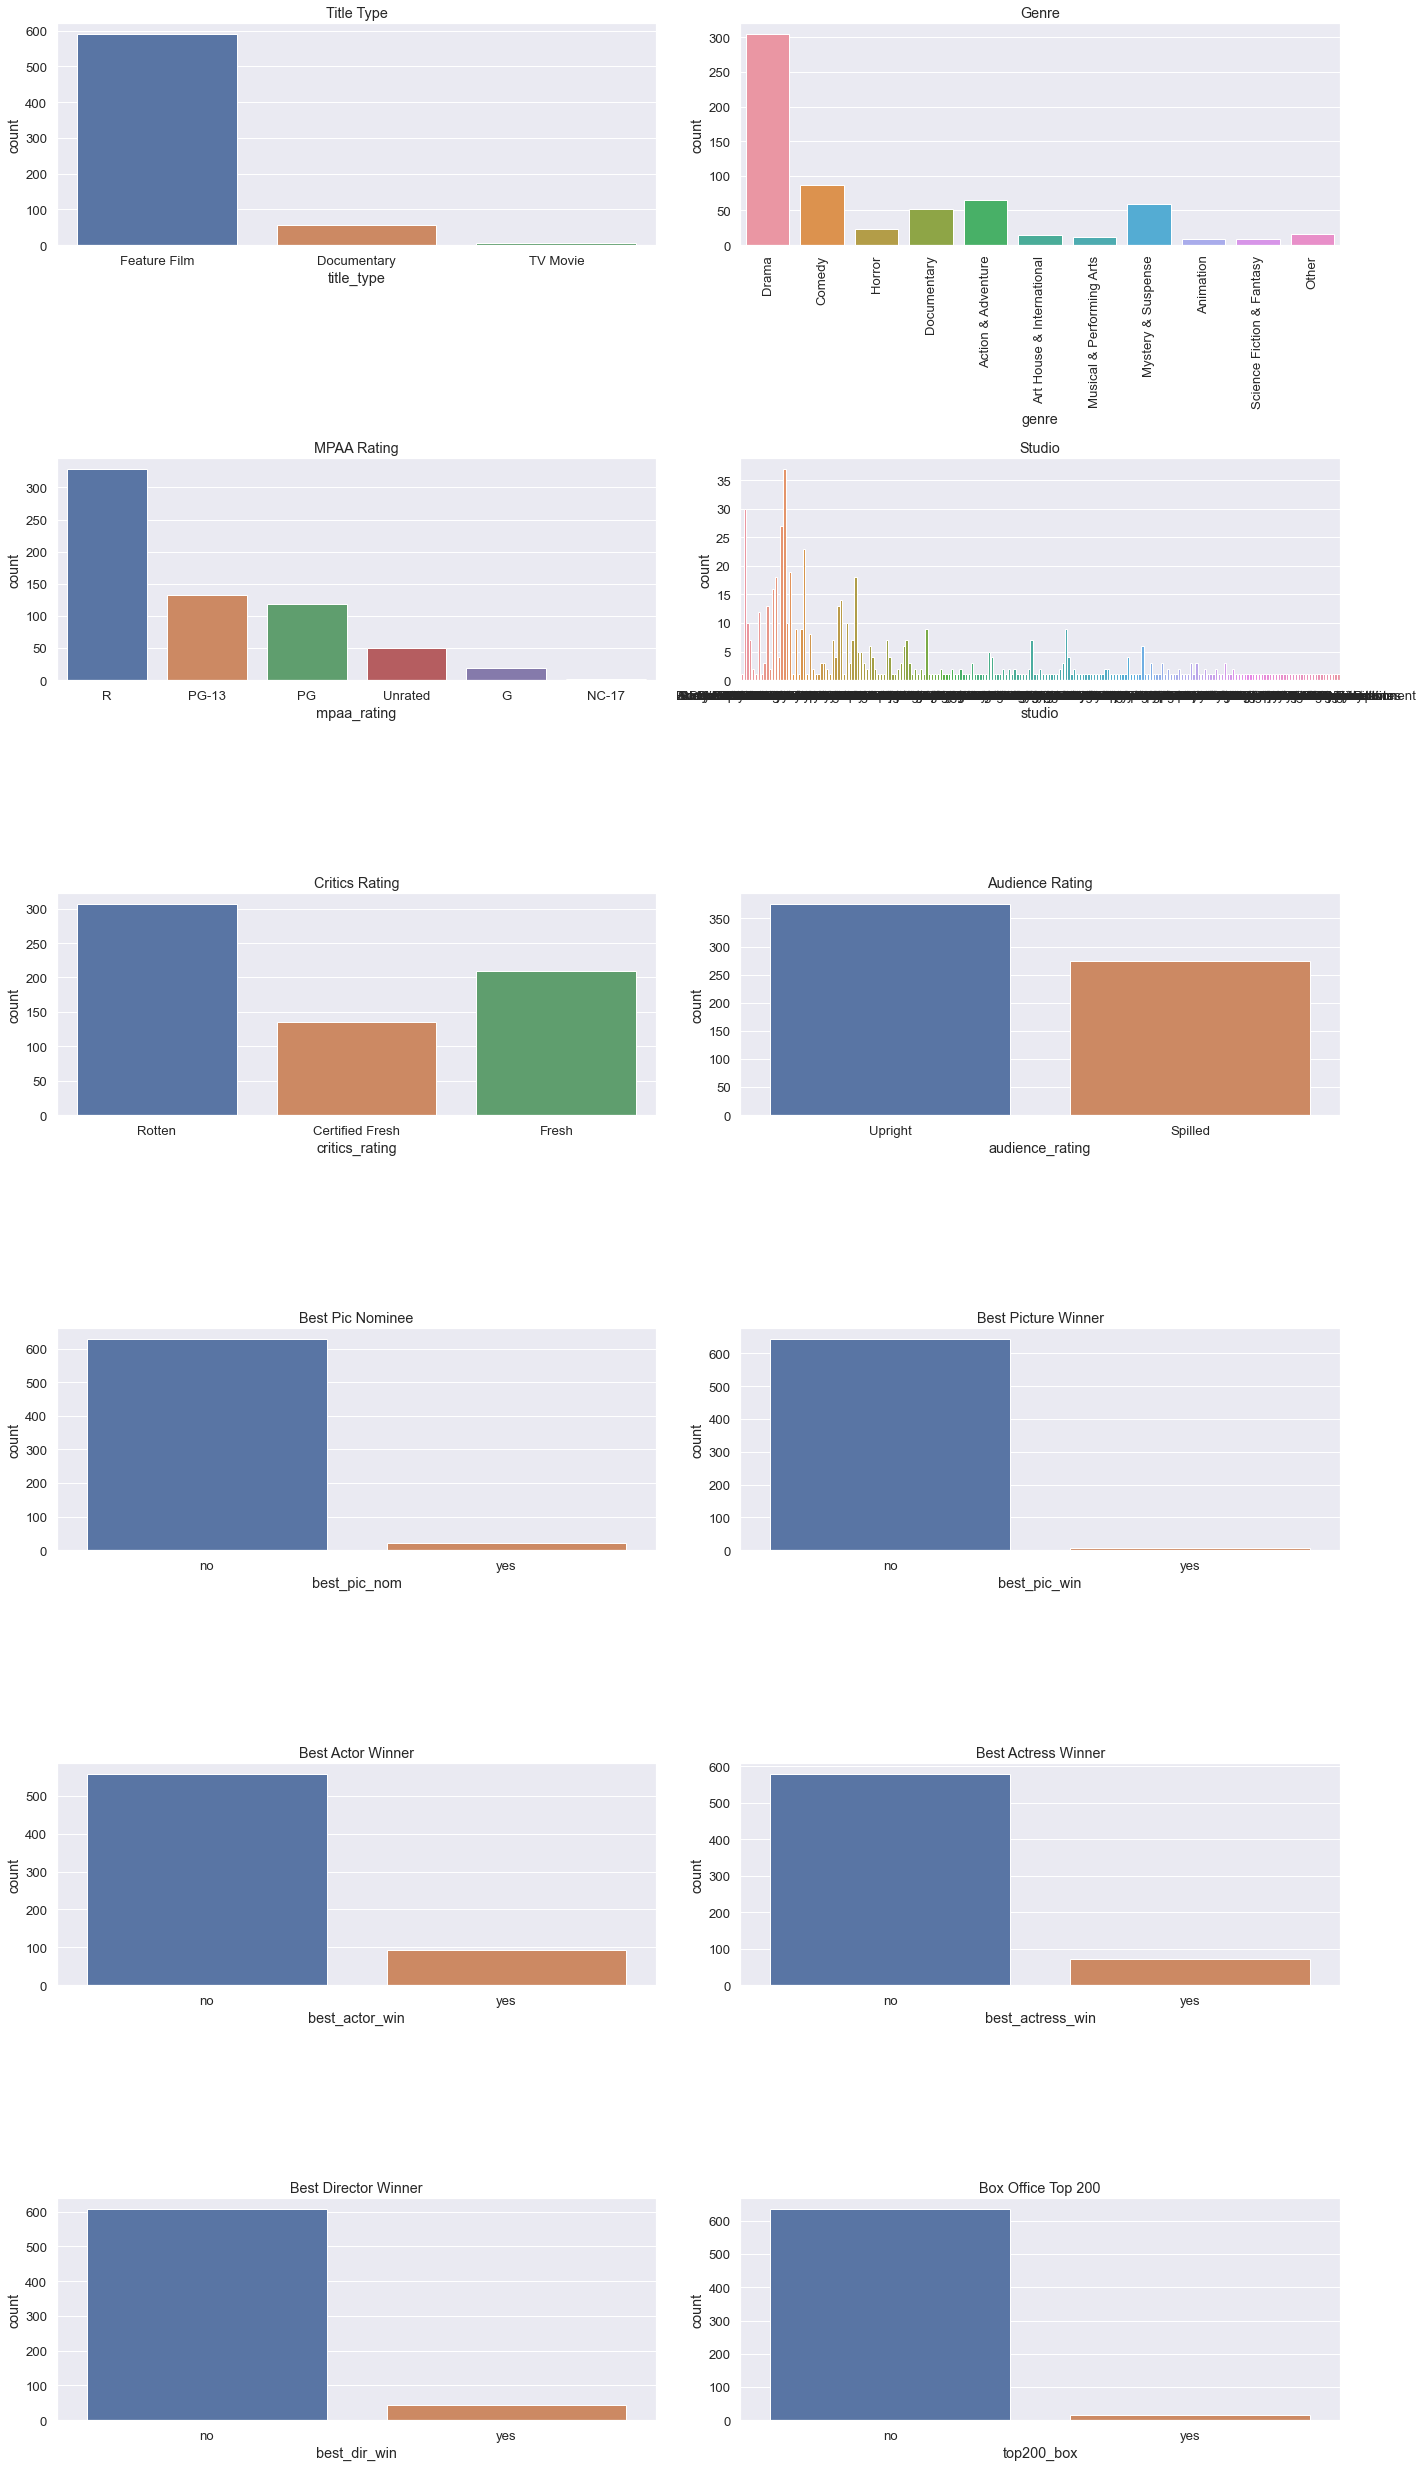

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Title Type")
sns.countplot(df.title_type)

plt.subplot(7,2,2)
plt.title("Genre")
plt.xticks(rotation=90)
sns.countplot(df.genre)

plt.subplot(7,2,3)
plt.title("MPAA Rating")
sns.countplot(df.mpaa_rating)

plt.subplot(7,2,4)
plt.title("Studio")
sns.countplot(df.studio)

plt.subplot(7,2,5)
plt.title("Critics Rating")
sns.countplot(df.critics_rating)

plt.subplot(7,2,6)
plt.title("Audience Rating")
sns.countplot(df.audience_rating)

plt.subplot(7,2,7)
plt.title("Best Pic Nominee")
sns.countplot(df.best_pic_nom)

plt.subplot(7,2,8)
plt.title("Best Picture Winner")
sns.countplot(df.best_pic_win)

plt.subplot(7,2,9)
plt.title("Best Actor Winner")
sns.countplot(df.best_actor_win)

plt.subplot(7,2,10)
plt.title("Best Actress Winner")
sns.countplot(df.best_actress_win)

plt.subplot(7,2,11)
plt.title("Best Director Winner")
sns.countplot(df.best_dir_win)

plt.subplot(7,2,12)
plt.title("Box Office Top 200")
sns.countplot(df.top200_box)

plt.tight_layout()
plt.show()

### Drop unwanted features

In [10]:
df.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'], dtype='object')

In [11]:
df.drop(['title', 'title_type', 'genre','mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 
        'dvd_rel_month', 'dvd_rel_day','critics_rating','audience_rating','best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 
        'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'],axis=1,inplace=True)

In [12]:
df

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score
0,80.0,5.5,899,45,73
1,101.0,7.3,12285,96,81
2,84.0,7.6,22381,91,91
3,139.0,7.2,35096,80,76
4,90.0,5.1,2386,33,27
...,...,...,...,...,...
646,97.0,5.9,8345,44,26
647,82.0,6.7,46794,29,81
648,87.0,5.9,10087,80,52
649,120.0,5.8,66054,31,34


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   runtime         650 non-null    float64
 1   imdb_rating     651 non-null    float64
 2   imdb_num_votes  651 non-null    int64  
 3   critics_score   651 non-null    int64  
 4   audience_score  651 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 25.6 KB


### Bivariate Data Exploration

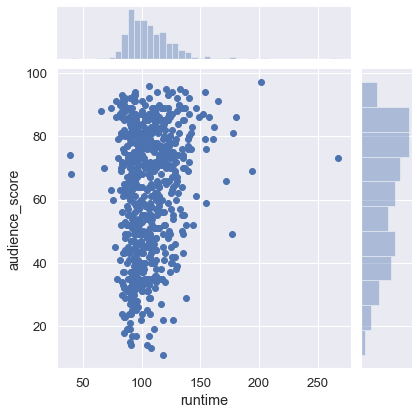

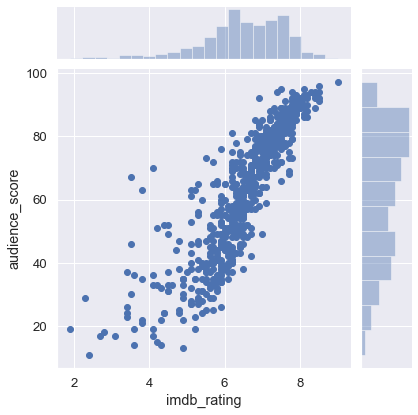

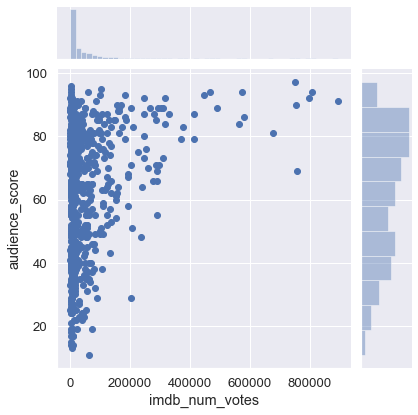

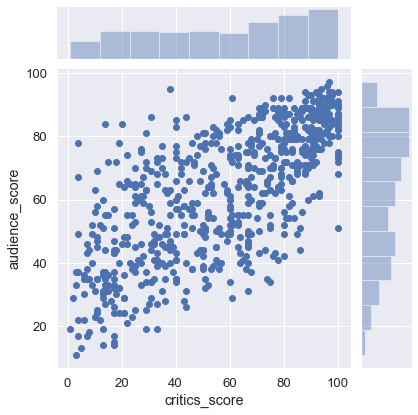

In [14]:
sns.jointplot(x='runtime', y='audience_score',data=df, kind='scatter')

sns.jointplot(x='imdb_rating', y='audience_score',data=df, kind='scatter')

sns.jointplot(x='imdb_num_votes', y='audience_score',data=df, kind='scatter')

sns.jointplot(x='critics_score', y='audience_score',data=df, kind='scatter')

plt.show()

### Correlation

In [15]:
df.corr()

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score
runtime,1.000000,0.268240,0.347215,0.172499,0.180963
imdb_rating,0.268240,1.000000,0.331152,0.765036,0.864865
imdb_num_votes,0.347215,0.331152,1.000000,0.209251,0.289813
critics_score,0.172499,0.765036,0.209251,1.000000,0.704276
audience_score,0.180963,0.864865,0.289813,0.704276,1.000000


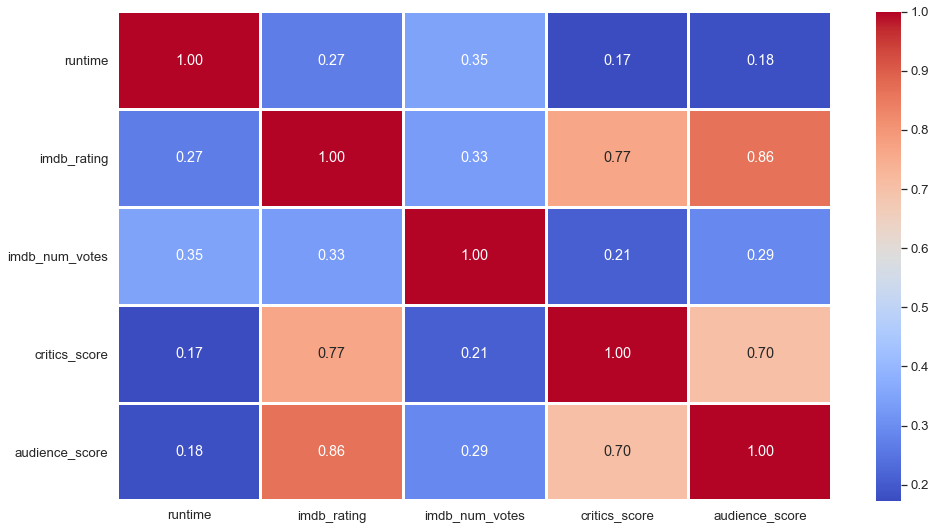

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

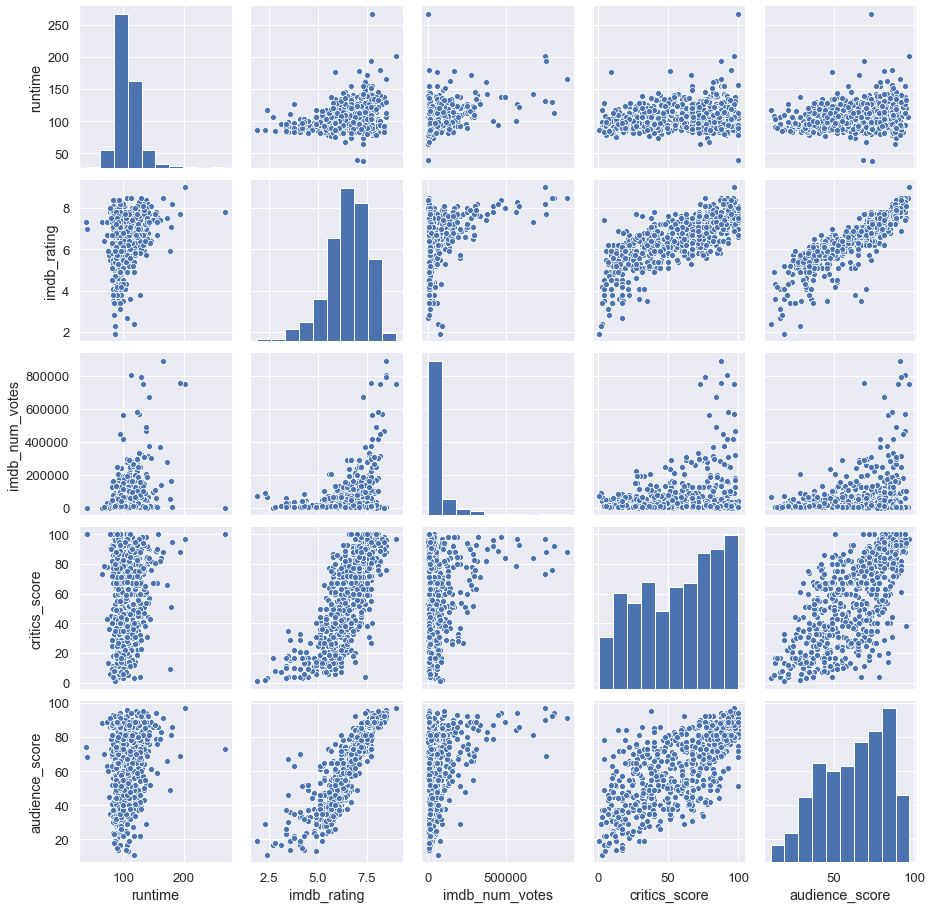

In [17]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [18]:
df.isnull().sum()

runtime           1
imdb_rating       0
imdb_num_votes    0
critics_score     0
audience_score    0
dtype: int64

In [19]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [20]:
imputer.fit(df)

MeanMedianImputer(variables=['runtime', 'imdb_rating', 'imdb_num_votes',
                             'critics_score', 'audience_score'])

In [21]:
df = imputer.transform(df)

In [22]:
df.isnull().sum()

runtime           0
imdb_rating       0
imdb_num_votes    0
critics_score     0
audience_score    0
dtype: int64

### Treat Duplicate Values

In [23]:
df.duplicated(keep='first').sum()

1

### Create and save processed dataset

In [24]:
#df.to_csv("moviestrain.csv",index=False)

In [25]:
df.shape

(651, 5)

## Predict Audience Score

### Train Test Split

In [26]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [27]:
X.values, y.values

(array([[8.0000e+01, 5.5000e+00, 8.9900e+02, 4.5000e+01],
        [1.0100e+02, 7.3000e+00, 1.2285e+04, 9.6000e+01],
        [8.4000e+01, 7.6000e+00, 2.2381e+04, 9.1000e+01],
        ...,
        [8.7000e+01, 5.9000e+00, 1.0087e+04, 8.0000e+01],
        [1.2000e+02, 5.8000e+00, 6.6054e+04, 3.1000e+01],
        [9.7000e+01, 4.2000e+00, 4.3574e+04, 1.7000e+01]]),
 array([73, 81, 91, 76, 27, 86, 76, 47, 89, 66, 75, 46, 89, 53, 36, 64, 80,
        92, 24, 19, 73, 86, 42, 71, 77, 41, 81, 43, 61, 91, 71, 77, 85, 70,
        57, 55, 70, 51, 94, 81, 64, 88, 64, 40, 94, 62, 64, 49, 17, 40, 88,
        75, 56, 52, 83, 72, 59, 38, 35, 43, 54, 44, 96, 89, 58, 52, 90, 55,
        52, 85, 43, 30, 38, 75, 55, 39, 59, 47, 24, 87, 83, 81, 35, 34, 92,
        55, 54, 14, 76, 40, 82, 87, 41, 75, 43, 52, 25, 74, 93, 90, 80, 34,
        37, 86, 33, 45, 81, 48, 24, 35, 91, 69, 75, 43, 35, 78, 78, 64, 40,
        88, 43, 65, 46, 55, 75, 67, 54, 41, 75, 76, 74, 87, 37, 86, 79, 42,
        63, 38, 51, 84, 44, 3

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((520, 4), (131, 4), (520,), (131,))

### Feature Scaling

In [30]:
X_train

,runtime,imdb_rating,imdb_num_votes,critics_score
432,119.0,6.8,11103,87
399,93.0,8.0,36909,98
346,94.0,7.9,38076,100
604,89.0,6.1,26301,49
603,116.0,5.7,48718,53
...,...,...,...,...
9,119.0,6.6,12496,83
359,108.0,6.8,37506,79
192,112.0,5.9,725,33
629,85.0,2.8,3790,8


In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[ 0.64158617,  0.26977263, -0.41831233,  0.99130441],
       [-0.64082734,  1.37362916, -0.20085178,  1.37252406],
       [-0.59150375,  1.28164111, -0.19101777,  1.44183673],
       ...,
       [ 0.29632099, -0.55811977, -0.50576507, -0.88013755],
       [-1.03541612, -3.40974913, -0.4799371 , -1.74654587],
       [-0.78879813,  1.09766503, -0.03223264, -0.11769824]])

In [35]:
X_test_scaled

array([[-6.40827343e-01, -7.42095855e-01, -3.50409625e-01,
        -1.43463888e+00],
       [-9.36768922e-01, -4.23764153e+00,  1.05123288e-01,
        -1.98914020e+00],
       [-5.91503746e-01, -1.90167591e-01,  2.08558505e-02,
         7.48710078e-01],
       [ 7.40233361e-01,  1.77784585e-01, -1.54802686e-02,
         2.98177754e-01],
       [ 7.40233361e-01,  8.57965411e-02, -4.80442708e-01,
        -3.25636233e-01],
       [-6.40827343e-01, -1.47800021e+00, -3.81335775e-01,
        -1.81585854e+00],
       [ 1.18414573e+00, -2.82155635e-01, -4.44325684e-01,
        -4.64261563e-01],
       [ 9.90266054e-02, -8.34083899e-01, -4.36008488e-01,
         1.94208756e-01],
       [-9.36768922e-01, -4.66131723e-01, -4.91372195e-01,
         9.56648074e-01],
       [ 3.79412281e-04, -5.58119767e-01,  1.85329035e-01,
        -5.68230561e-01],
       [-4.89441843e-02,  7.29712849e-01, -2.19972043e-03,
         4.36803084e-01],
       [ 4.97030088e-02, -9.81795470e-02, -4.83712285e-01,
      

### Model Training

### Using PyCaret

In [36]:
exp_reg = setup(data = df, target = 'audience_score', session_id=0, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(651, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [37]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,6.647200,83.402600,9.099100,0.792000,0.196400,0.139700
1,Extreme Gradient Boosting,6.679800,87.436800,9.296400,0.780600,0.204800,0.142200
2,Gradient Boosting Regressor,6.703800,88.956600,9.384400,0.776600,0.205700,0.143300
3,Random Forest,6.905600,91.412500,9.512900,0.772200,0.210300,0.149000
4,Light Gradient Boosting Machine,6.952300,92.913600,9.592000,0.766900,0.211000,0.147300
5,AdaBoost Regressor,7.302600,96.772700,9.772700,0.761200,0.223300,0.168300
6,Extra Trees Regressor,7.141800,97.645900,9.823200,0.756200,0.219000,0.155200
7,K Neighbors Regressor,7.491200,100.668500,9.962000,0.746700,0.212100,0.154300
8,Ridge Regression,7.686900,102.072300,9.995500,0.745500,0.242400,0.163800
9,Linear Regression,7.681300,102.082800,9.995100,0.745400,0.242400,0.163800


In [38]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.8670,98.3357,9.9164,0.7679,0.2008,0.1336
1,6.5469,83.3773,9.1311,0.8106,0.1841,0.1350
2,6.2076,73.1855,8.5548,0.7758,0.1963,0.1404
3,7.0753,82.2519,9.0693,0.8329,0.2108,0.1706
4,6.8862,85.2206,9.2315,0.7333,0.1697,0.1216
5,6.0639,64.9538,8.0594,0.8510,0.1603,0.1175
6,6.4169,116.9859,10.8160,0.6794,0.2517,0.1210
7,7.2507,88.5254,9.4088,0.8136,0.2335,0.1830
8,6.4853,71.9568,8.4827,0.8093,0.1503,0.1129
9,6.6723,69.2329,8.3206,0.8462,0.2066,0.1614


In [39]:
print(cat)

In [40]:
tuned_cat = tune_model('catboost', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.5976,93.8717,9.6887,0.7784,0.2050,0.1321
1,6.5135,85.6355,9.2539,0.8054,0.1966,0.1428
2,5.4581,61.9992,7.8740,0.8100,0.1989,0.1365
3,7.5797,92.6546,9.6257,0.8117,0.2377,0.1936
4,7.9040,116.5350,10.7951,0.6352,0.2062,0.1411
5,5.5099,55.6068,7.4570,0.8725,0.1509,0.1081
6,6.5872,120.8227,10.9919,0.6689,0.2530,0.1246
7,7.1994,80.9686,8.9983,0.8296,0.2261,0.1802
8,6.0139,65.4295,8.0888,0.8266,0.1401,0.1025
9,7.0064,74.2622,8.6175,0.8351,0.2342,0.1839


In [41]:
print(tuned_cat)

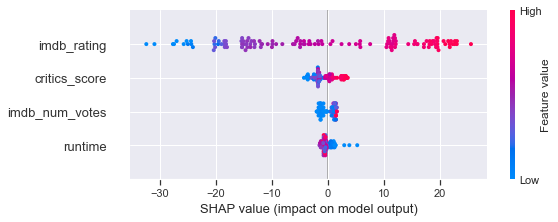

In [42]:
interpret_model(tuned_cat)

In [43]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,6.5575,75.446,8.686,0.7964,0.1759,0.1295


,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,Label
0,-0.660154,-0.731689,-0.342490,-1.433634,44,43.2409
1,-0.969186,-4.237505,0.140006,-1.997388,19,28.2623
2,-0.608649,-0.178139,0.050751,0.786150,49,58.1592
3,0.781995,0.190894,0.012264,0.328099,70,63.5129
4,0.781995,0.098636,-0.480220,-0.306125,66,58.0552
...,...,...,...,...,...,...
126,-0.248112,0.190894,-0.430585,0.645211,71,63.8282
127,-0.917681,0.283152,-0.367437,0.680446,73,70.9544
128,-0.454133,-2.115564,-0.124591,-1.433634,51,31.5633
129,-0.454133,-0.362656,-0.488360,-0.059482,40,46.4926
